# Used Car Prices predictor

## Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
% matplotlib inline

# read in the csv file
df = pd.read_csv('vehicles.csv')

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## Pre-processing

In [2]:
df.shape

(426880, 26)

In [3]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
id              426880 non-null int64
url             426880 non-null object
region          426880 non-null object
region_url      426880 non-null object
price           426880 non-null int64
year            425675 non-null float64
manufacturer    409234 non-null object
model           421603 non-null object
condition       252776 non-null object
cylinders       249202 non-null object
fuel            423867 non-null object
odometer        422480 non-null float64
title_status    418638 non-null object
transmission    424324 non-null object
VIN             265838 non-null object
drive           296313 non-null object
size            120519 non-null object
type            334022 non-null object
paint_color     296677 non-null object
image_url       426812 non-null object
description     426810 non-null object
county          0 non-null float64
state           426880 non-null obj

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
# Checking missing values

df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [7]:
# Dropping columns not needed or with high Null values

df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 
         'long'], axis = 1, inplace = True)

In [8]:
df.shape

(426880, 17)

In [9]:
# Checking for duplicates

df.duplicated().sum()

39

In [10]:
# Dropping duplicates

df.drop_duplicates(keep='first', inplace=True)

In [11]:
df.shape

(426841, 17)

In [12]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


In [13]:
# Checking missing values

df.isnull().sum()

region               0
price                0
year              1194
manufacturer     17635
model             5266
condition       174080
cylinders       177654
fuel              3002
odometer          4389
title_status      8221
transmission      2545
drive           130550
size            306325
type             92847
paint_color     130181
state                0
posting_date        57
dtype: int64

In [14]:
df1 = df.dropna()

In [15]:
df1.shape

(79193, 17)

In [16]:
df1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,2021-04-29T17:19:18-0500
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,2021-04-27T12:20:01-0500
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,2021-04-26T11:15:36-0500
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,2021-04-24T18:39:59-0500


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79193 entries, 31 to 426836
Data columns (total 17 columns):
region          79193 non-null object
price           79193 non-null int64
year            79193 non-null float64
manufacturer    79193 non-null object
model           79193 non-null object
condition       79193 non-null object
cylinders       79193 non-null object
fuel            79193 non-null object
odometer        79193 non-null float64
title_status    79193 non-null object
transmission    79193 non-null object
drive           79193 non-null object
size            79193 non-null object
type            79193 non-null object
paint_color     79193 non-null object
state           79193 non-null object
posting_date    79193 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 10.9+ MB


## EDA

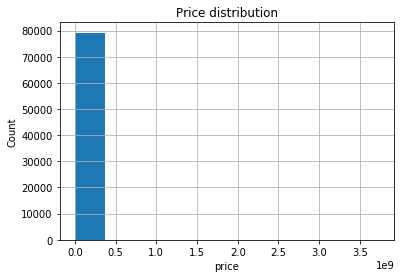

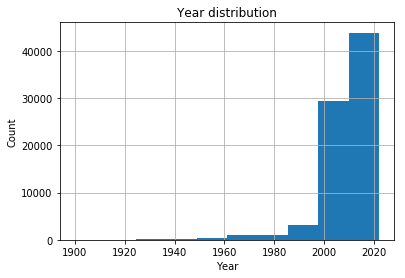

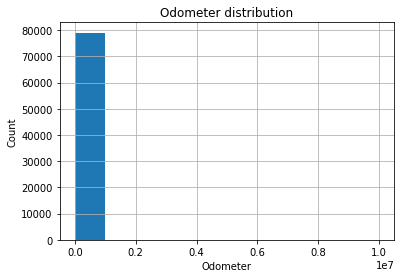

In [18]:
# Checking the distribution of features

df1['price'].hist()
plt.title('Price distribution')
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

df1['year'].hist()
plt.title('Year distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

df1['odometer'].hist()
plt.title('Odometer distribution')
plt.xlabel('Odometer')
plt.ylabel('Count')
plt.show()

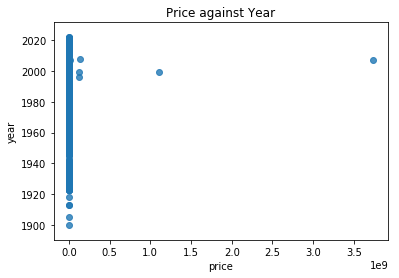

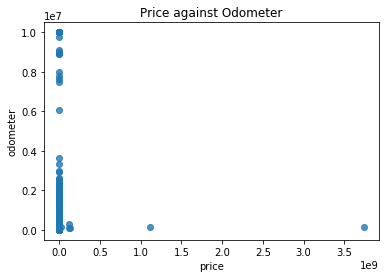

In [19]:
# Checking outliers

sns.regplot(x=df1['price'], y=df1['year'], data=df1, fit_reg=False)
plt.title('Price against Year')
plt.show()

sns.regplot(x=df1['price'], y=df1['odometer'], data=df1, fit_reg=False)
plt.title('Price against Odometer')
plt.show()

Text(0.5,1,'Distribution of manufacturers')

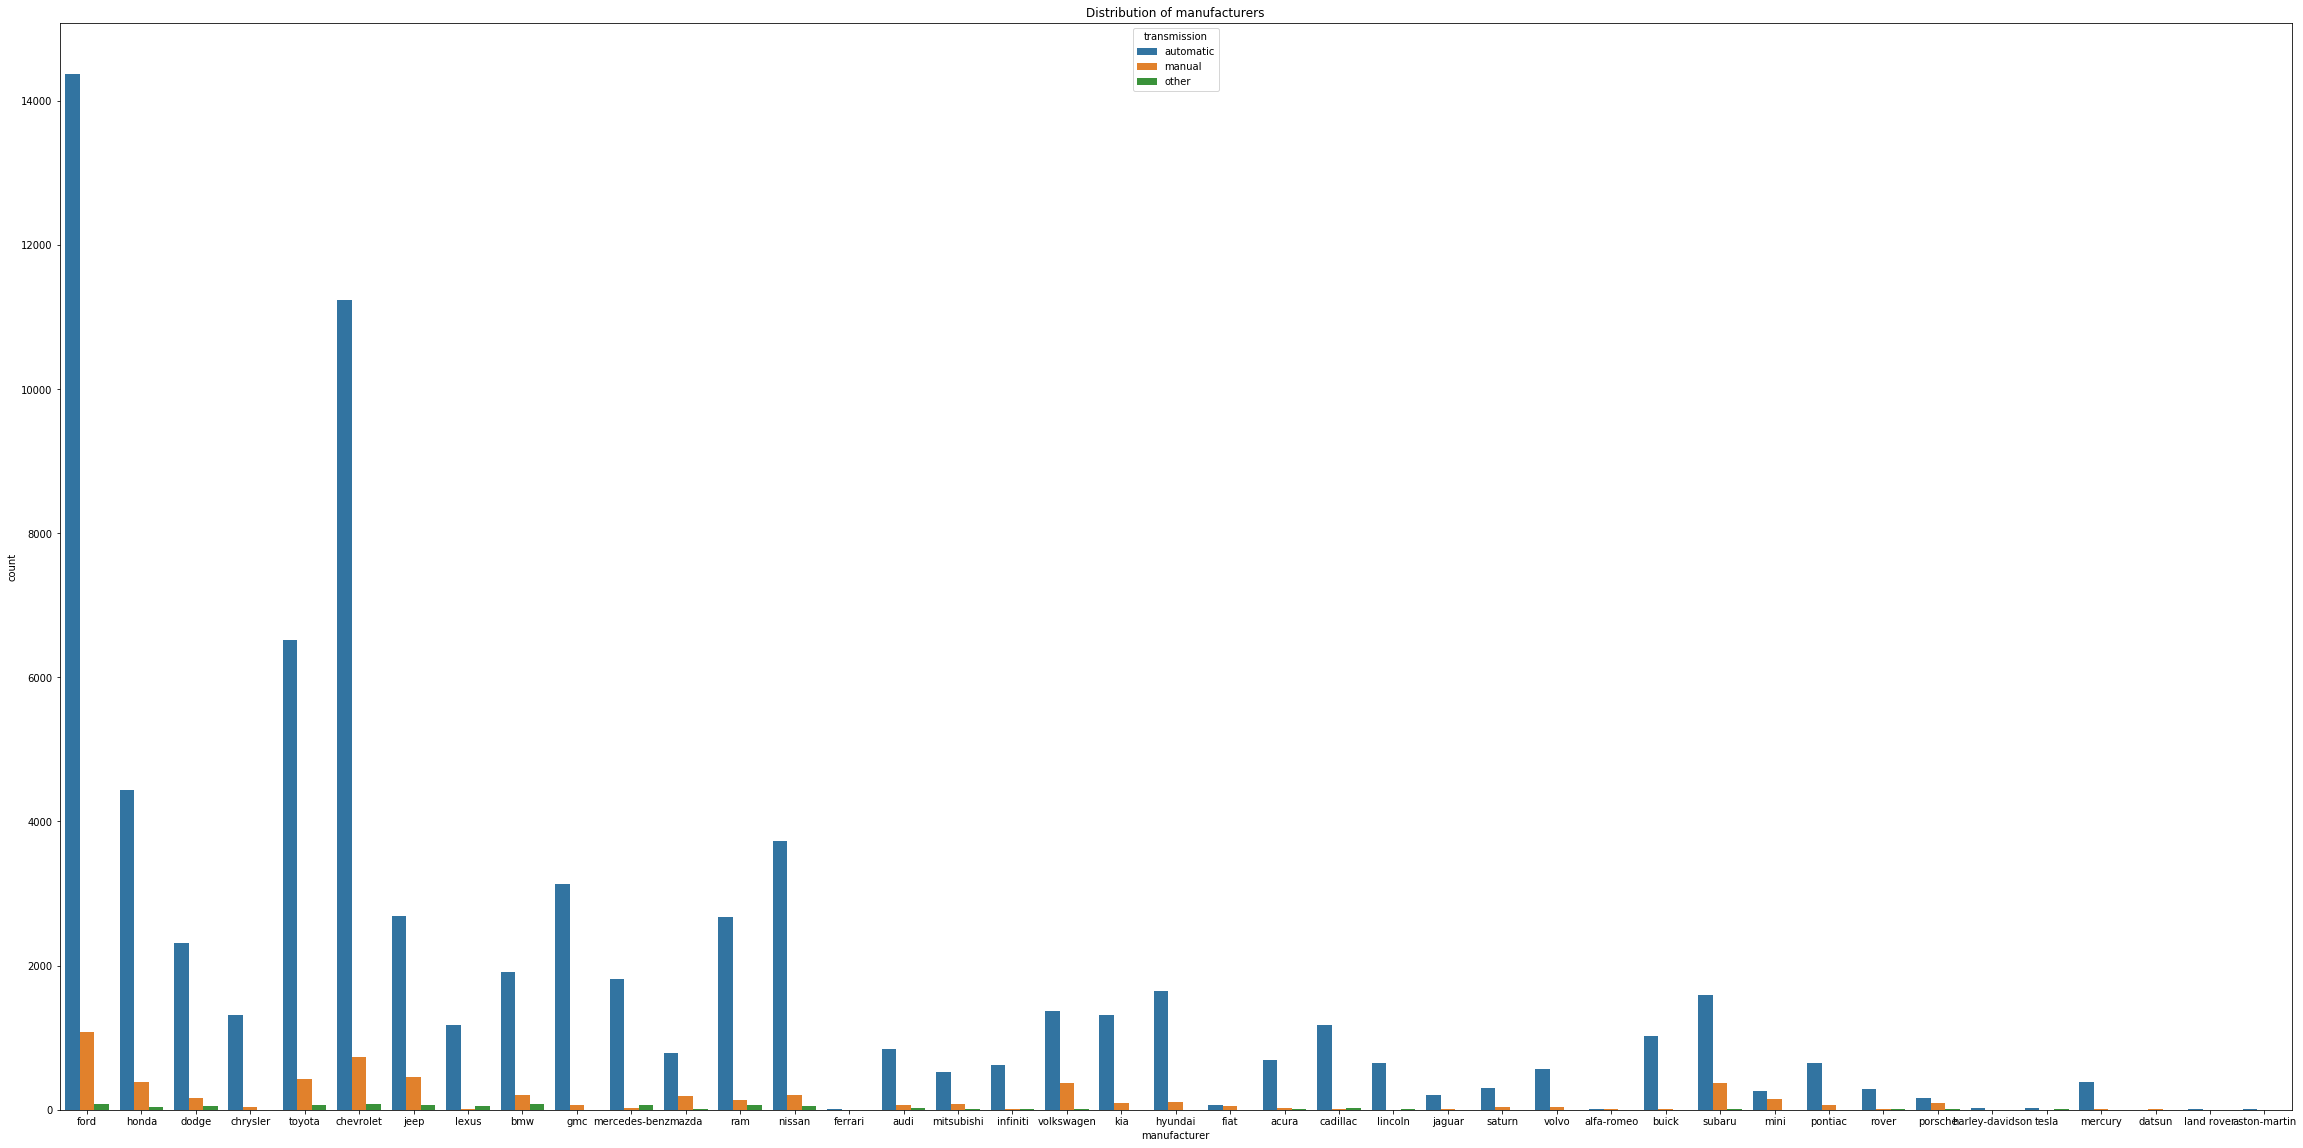

In [20]:
plt.figure(figsize=[40,20])
sns.countplot(x='manufacturer', hue='transmission', data=df1)
plt.title('Distribution of manufacturers')

Text(0.5,1,'Distribution of vehicle type')

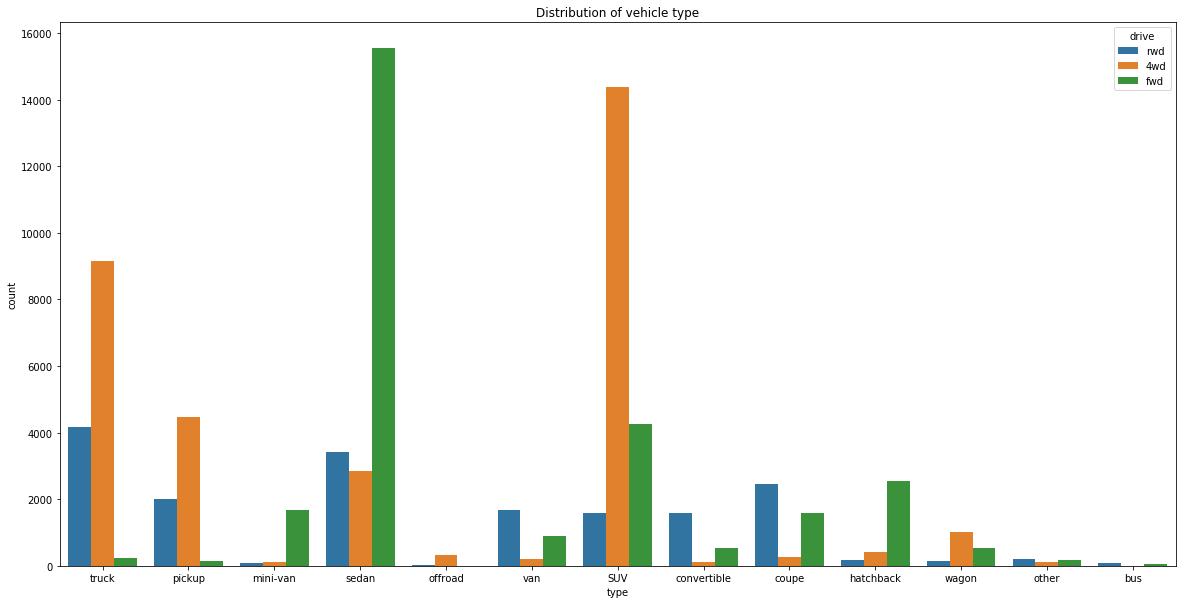

In [21]:
plt.figure(figsize=[20,10])
sns.countplot(x='type', hue='drive', data=df1)
plt.title('Distribution of vehicle type')

Text(0.5,1,'Distribution of transmission')

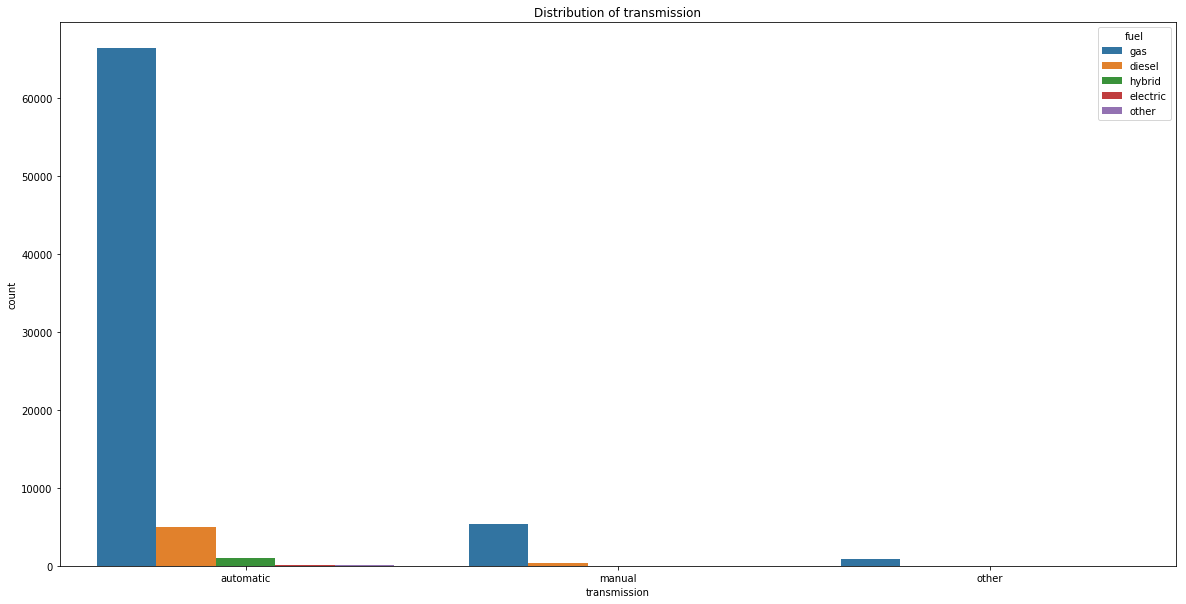

In [22]:
plt.figure(figsize=[20,10])
sns.countplot(x='transmission', hue='fuel', data=df1)
plt.title('Distribution of transmission')

## Feature engineering

In [23]:
# Finding outliers

df1[df1['price'] > 1e6]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,rwd,full-size,pickup,white,ca,2021-04-11T11:40:08-0700
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,fwd,mid-size,sedan,green,ca,2021-04-06T16:40:31-0700
136516,spokane / coeur d'alene,17000000,2007.0,ram,2500,good,8 cylinders,diesel,170000.0,rebuilt,automatic,4wd,full-size,pickup,black,id,2021-05-02T19:27:17-0700
137807,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,automatic,fwd,full-size,sedan,white,id,2021-04-29T08:48:15-0700
155421,terre haute,1234567,2006.0,jeep,wrangler,like new,6 cylinders,gas,123456.0,clean,automatic,4wd,mid-size,SUV,custom,in,2021-04-18T11:26:55-0400
219241,southwest MS,1111111,1970.0,dodge,challenger,fair,8 cylinders,gas,42000.0,clean,automatic,rwd,full-size,coupe,blue,ms,2021-04-11T19:04:00-0500
230753,asheville,135008900,2008.0,nissan,titan se kingcab,like new,8 cylinders,gas,110500.0,clean,automatic,4wd,full-size,truck,grey,nc,2021-04-16T19:22:21-0400
307488,stillwater,123456789,1996.0,gmc,sierra 2500,fair,8 cylinders,gas,320000.0,clean,automatic,4wd,full-size,pickup,black,ok,2021-04-07T12:44:56-0500
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,automatic,4wd,full-size,pickup,silver,or,2021-04-16T18:16:12-0700


In [24]:
# Dealing with outliers

df2 = df1[df1['price'] < 1e6]
df2.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,2021-04-29T17:19:18-0500
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,2021-04-27T12:20:01-0500
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,2021-04-26T11:15:36-0500
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,2021-04-24T18:39:59-0500


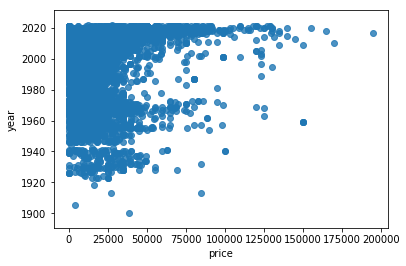

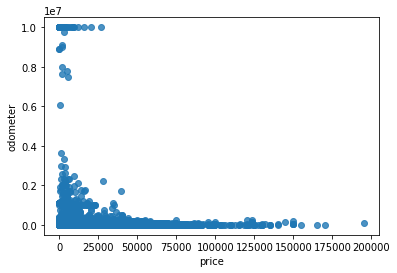

In [25]:
# Re-checking outliers

sns.regplot(x=df2['price'], y=df2['year'], data=df2, fit_reg=False)
plt.show()
sns.regplot(x=df2['price'], y=df2['odometer'], data=df2, fit_reg=False)
plt.show()

In [26]:
# Categorical variable encoding

from sklearn.preprocessing import LabelEncoder 
cat_features = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 
                'drive', 'size', 'type', 'paint_color', 'state', 'posting_date'] 
encoder = LabelEncoder() 
encoded = df2[cat_features].apply(encoder.fit_transform)
df2.drop(cat_features, axis=1, inplace=True)
df2 = pd.concat([encoded,df2],axis = 1) 
df2.head(1)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,posting_date,price,year,odometer
31,16,13,3869,0,5,2,0,0,2,1,10,0,1,67406,15000,2013.0,128000.0


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79184 entries, 31 to 426836
Data columns (total 17 columns):
region          79184 non-null int64
manufacturer    79184 non-null int64
model           79184 non-null int64
condition       79184 non-null int64
cylinders       79184 non-null int64
fuel            79184 non-null int64
title_status    79184 non-null int64
transmission    79184 non-null int64
drive           79184 non-null int64
size            79184 non-null int64
type            79184 non-null int64
paint_color     79184 non-null int64
state           79184 non-null int64
posting_date    79184 non-null int64
price           79184 non-null int64
year            79184 non-null float64
odometer        79184 non-null float64
dtypes: float64(2), int64(15)
memory usage: 10.9 MB


In [28]:
df2.head()

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,posting_date,price,year,odometer
31,16,13,3869,0,5,2,0,0,2,1,10,0,1,67406,15000,2013.0,128000.0
55,16,13,4233,2,6,0,0,0,0,1,8,1,1,48813,19900,2004.0,88000.0
59,16,16,6336,0,5,2,0,0,1,1,5,9,1,40419,14000,2012.0,95000.0
65,16,13,4365,2,6,0,0,1,2,1,10,10,1,37038,22500,2001.0,144700.0
73,16,10,2242,0,6,2,4,0,2,2,9,5,1,34347,15000,2017.0,90000.0


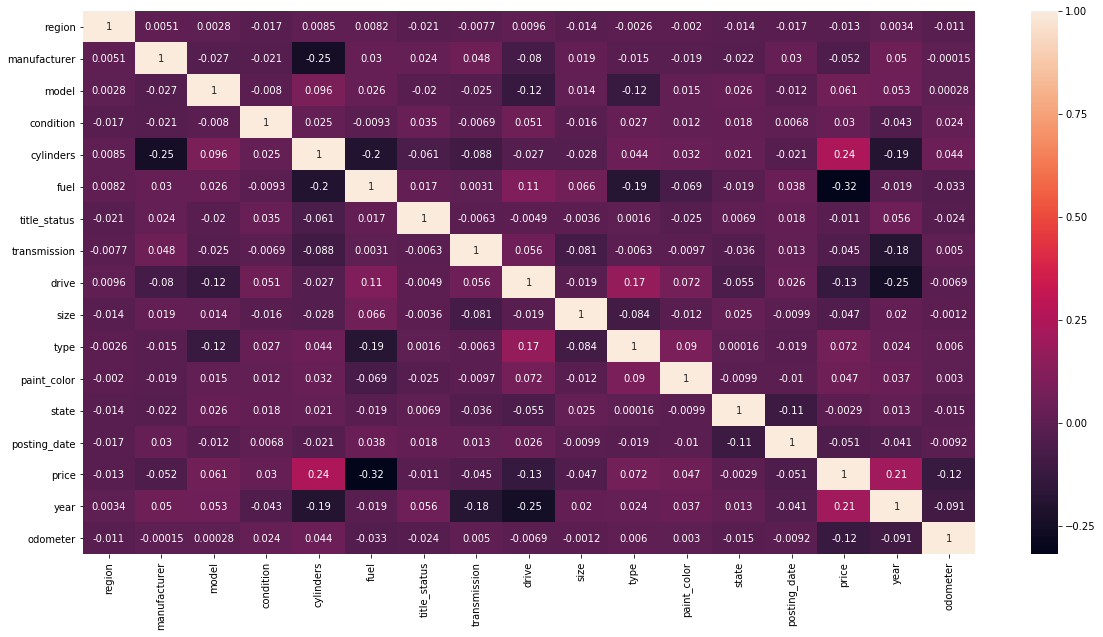

In [29]:
# Correlation matrix

corr = df2.corr()

f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(corr, annot=True)

## Train and test split

In [30]:
df2.columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state', 'posting_date', 'price', 'year', 'odometer'],
      dtype='object')

In [31]:
X = df2[['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 
        'drive', 'size', 'type', 'paint_color', 'state', 'posting_date', 'year', 'odometer']]
        
y = df2['price']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Modelling

In [33]:
# Fitting model and predicting

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
# Finding R2 metric

from sklearn import metrics

results_50 = metrics.r2_score(y_test, y_pred)

print('R^2:', results_50)

R^2: 0.78473007889


## Hyper-parameter tuning

In [35]:
# Identifying parameters

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200]}
model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [36]:
# Finding best parameter

grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 200}

In [37]:
# Predicting using the best parameter

model = RandomForestRegressor(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results_200 = metrics.r2_score(y_test, y_pred)

print('R^2:', results_200)

R^2: 0.789611678689


In [38]:
# Iteration 2 of tuning

param_grid = {'n_estimators': [200, 300, 400]}
model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [39]:
grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 400}

In [40]:
results_400 = metrics.r2_score(y_test, y_pred)

print('R^2:', results_400)

R^2: 0.789611678689


Text(0,0.5,'Iteration')

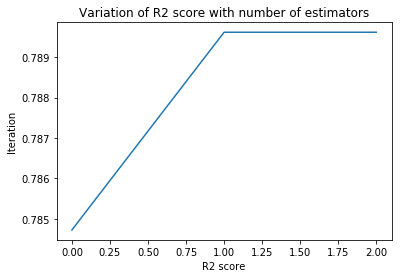

In [43]:
# Plotting change in R2 scores

plt.plot([results_50, results_200, results_400])
plt.title('Variation of R2 score with number of estimators')
plt.xlabel('R2 score')
plt.ylabel('Iteration')